In [ ]:
import matplotlib.pyplot as plt
import torch
import seaborn as sns
import numpy as np
import sys, os

sys.path.insert(0, os.path.abspath('..'))
from configs import datasets_config as config

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams.update({'font.size': 17, 'legend.fontsize': 17})    


boiler_root = config.main_path['main']
rank = 10
rng = np.arange(0, rank) + 1
ticks = np.arange(0, (len(rng) + 1), 1)

def get_avg(fpr_val, tpr_val, auc_dict):
    auc_avg = []
    range_eval = np.arange(0, 1, 1e-6)
    total_tpr = np.empty((0, range_eval.shape[0]), int)
    
    for ds in fpr_val:
        interp_y = np.interp(range_eval, fpr_val[ds], tpr_val[ds])
        total_tpr = np.append(total_tpr, np.array([interp_y]), axis=0)
    avg_tpr = np.mean(total_tpr, axis=0)

    for ds_ in auc_dict:
        auc_avg.append(auc_dict[ds_])
    auc_avg = np.mean(np.array(auc_avg), 0)

    return range_eval, avg_tpr, auc_avg

In [2]:
# CB-Net
cb_net_peri_eer_dict = torch.load(str(boiler_root) + '/roc/cb_net/peri/peri_eer_dict.pt')
cb_net_peri_fpr_dict = torch.load(str(boiler_root) + '/roc/cb_net/peri/peri_fpr_dict.pt')
cb_net_peri_tpr_dict = torch.load(str(boiler_root) + '/roc/cb_net/peri/peri_tpr_dict.pt')
cb_net_peri_auc_dict = torch.load(str(boiler_root) + '/roc/cb_net/peri/peri_auc_dict.pt')
cb_net_face_eer_dict = torch.load(str(boiler_root) + '/roc/cb_net/face/face_eer_dict.pt')
cb_net_face_fpr_dict = torch.load(str(boiler_root) + '/roc/cb_net/face/face_fpr_dict.pt')
cb_net_face_tpr_dict = torch.load(str(boiler_root) + '/roc/cb_net/face/face_tpr_dict.pt')
cb_net_face_auc_dict = torch.load(str(boiler_root) + '/roc/cb_net/face/face_auc_dict.pt')
cb_net_cm_eer_dict = torch.load(str(boiler_root) + '/roc/cb_net/cm/cm_eer_dict.pt')
cb_net_cm_fpr_dict = torch.load(str(boiler_root) + '/roc/cb_net/cm/cm_fpr_dict.pt')
cb_net_cm_tpr_dict = torch.load(str(boiler_root) + '/roc/cb_net/cm/cm_tpr_dict.pt')
cb_net_cm_auc_dict = torch.load(str(boiler_root) + '/roc/cb_net/cm/cm_auc_dict.pt')
range_, cb_net_peri_tpr, cb_net_peri_avg = get_avg(cb_net_peri_fpr_dict, cb_net_peri_tpr_dict, cb_net_peri_auc_dict)
range_, cb_net_face_tpr, cb_net_face_avg = get_avg(cb_net_face_fpr_dict, cb_net_face_tpr_dict, cb_net_face_auc_dict)
range_, cb_net_cm_tpr, cb_net_cm_avg = get_avg(cb_net_cm_fpr_dict, cb_net_cm_tpr_dict, cb_net_cm_auc_dict)

# HA-ViT
havit_peri_eer_dict = torch.load(str(boiler_root) + '/roc/ha_vit/peri/peri_eer_dict.pt')
havit_peri_fpr_dict = torch.load(str(boiler_root) + '/roc/ha_vit/peri/peri_fpr_dict.pt')
havit_peri_tpr_dict = torch.load(str(boiler_root) + '/roc/ha_vit/peri/peri_tpr_dict.pt')
havit_peri_auc_dict = torch.load(str(boiler_root) + '/roc/ha_vit/peri/peri_auc_dict.pt')
havit_face_eer_dict = torch.load(str(boiler_root) + '/roc/ha_vit/face/face_eer_dict.pt')
havit_face_fpr_dict = torch.load(str(boiler_root) + '/roc/ha_vit/face/face_fpr_dict.pt')
havit_face_tpr_dict = torch.load(str(boiler_root) + '/roc/ha_vit/face/face_tpr_dict.pt')
havit_face_auc_dict = torch.load(str(boiler_root) + '/roc/ha_vit/face/face_auc_dict.pt')
havit_cm_eer_dict = torch.load(str(boiler_root) + '/roc/ha_vit/cm/cm_eer_dict.pt')
havit_cm_fpr_dict = torch.load(str(boiler_root) + '/roc/ha_vit/cm/cm_fpr_dict.pt')
havit_cm_tpr_dict = torch.load(str(boiler_root) + '/roc/ha_vit/cm/cm_tpr_dict.pt')
havit_cm_auc_dict = torch.load(str(boiler_root) + '/roc/ha_vit/cm/cm_auc_dict.pt')
range_, havit_peri_tpr, havit_peri_avg = get_avg(havit_peri_fpr_dict, havit_peri_tpr_dict, havit_peri_auc_dict)
range_, havit_face_tpr, havit_face_avg = get_avg(havit_face_fpr_dict, havit_face_tpr_dict, havit_face_auc_dict)
range_, havit_cm_tpr, havit_cm_avg = get_avg(havit_cm_fpr_dict, havit_cm_tpr_dict, havit_cm_auc_dict)

# GC2SA-Net
gc2sa_net_peri_eer_dict = torch.load(str(boiler_root) + '/roc/gc2sa_net/peri/peri_eer_dict.pt')
gc2sa_net_peri_fpr_dict = torch.load(str(boiler_root) + '/roc/gc2sa_net/peri/peri_fpr_dict.pt')
gc2sa_net_peri_tpr_dict = torch.load(str(boiler_root) + '/roc/gc2sa_net/peri/peri_tpr_dict.pt')
gc2sa_net_peri_auc_dict = torch.load(str(boiler_root) + '/roc/gc2sa_net/peri/peri_auc_dict.pt')
gc2sa_net_face_eer_dict = torch.load(str(boiler_root) + '/roc/gc2sa_net/face/face_eer_dict.pt')
gc2sa_net_face_fpr_dict = torch.load(str(boiler_root) + '/roc/gc2sa_net/face/face_fpr_dict.pt')
gc2sa_net_face_tpr_dict = torch.load(str(boiler_root) + '/roc/gc2sa_net/face/face_tpr_dict.pt')
gc2sa_net_face_auc_dict = torch.load(str(boiler_root) + '/roc/gc2sa_net/face/face_auc_dict.pt')
gc2sa_net_cm_eer_dict = torch.load(str(boiler_root) + '/roc/gc2sa_net/cm/cm_eer_dict.pt')
gc2sa_net_cm_fpr_dict = torch.load(str(boiler_root) + '/roc/gc2sa_net/cm/cm_fpr_dict.pt')
gc2sa_net_cm_tpr_dict = torch.load(str(boiler_root) + '/roc/gc2sa_net/cm/cm_tpr_dict.pt')
gc2sa_net_cm_auc_dict = torch.load(str(boiler_root) + '/roc/gc2sa_net/cm/cm_auc_dict.pt')
range_, gc2sa_net_peri_tpr, gc2sa_net_peri_avg = get_avg(gc2sa_net_peri_fpr_dict, gc2sa_net_peri_tpr_dict, gc2sa_net_peri_auc_dict)
range_, gc2sa_net_face_tpr, gc2sa_net_face_avg = get_avg(gc2sa_net_face_fpr_dict, gc2sa_net_face_tpr_dict, gc2sa_net_face_auc_dict)
range_, gc2sa_net_cm_tpr, gc2sa_net_cm_avg = get_avg(gc2sa_net_cm_fpr_dict, gc2sa_net_cm_tpr_dict, gc2sa_net_cm_auc_dict)

# MFA-ViT
mfavit_peri_eer_dict = torch.load(str(boiler_root) + '/roc/mfa_vit/peri/peri_eer_dict.pt')
mfavit_peri_fpr_dict = torch.load(str(boiler_root) + '/roc/mfa_vit/peri/peri_fpr_dict.pt')
mfavit_peri_tpr_dict = torch.load(str(boiler_root) + '/roc/mfa_vit/peri/peri_tpr_dict.pt')
mfavit_peri_auc_dict = torch.load(str(boiler_root) + '/roc/mfa_vit/peri/peri_auc_dict.pt')
mfavit_face_eer_dict = torch.load(str(boiler_root) + '/roc/mfa_vit/face/face_eer_dict.pt')
mfavit_face_fpr_dict = torch.load(str(boiler_root) + '/roc/mfa_vit/face/face_fpr_dict.pt')
mfavit_face_tpr_dict = torch.load(str(boiler_root) + '/roc/mfa_vit/face/face_tpr_dict.pt')
mfavit_face_auc_dict = torch.load(str(boiler_root) + '/roc/mfa_vit/face/face_auc_dict.pt')
mfavit_cm_eer_dict = torch.load(str(boiler_root) + '/roc/mfa_vit/cm/cm_eer_dict.pt')
mfavit_cm_fpr_dict = torch.load(str(boiler_root) + '/roc/mfa_vit/cm/cm_fpr_dict.pt')
mfavit_cm_tpr_dict = torch.load(str(boiler_root) + '/roc/mfa_vit/cm/cm_tpr_dict.pt')
mfavit_cm_auc_dict = torch.load(str(boiler_root) + '/roc/mfa_vit/cm/cm_auc_dict.pt')
range_, mfavit_peri_tpr, mfavit_peri_avg = get_avg(mfavit_peri_fpr_dict, mfavit_peri_tpr_dict, mfavit_peri_auc_dict)
range_, mfavit_face_tpr, mfavit_face_avg = get_avg(mfavit_face_fpr_dict, mfavit_face_tpr_dict, mfavit_face_auc_dict)
range_, mfavit_cm_tpr, mfavit_cm_avg = get_avg(mfavit_cm_fpr_dict, mfavit_cm_tpr_dict, mfavit_cm_auc_dict)

# AELNet
ael_net_peri_eer_dict = torch.load(str(boiler_root) + '/roc/ael_net/peri/peri_eer_dict.pt')
ael_net_peri_fpr_dict = torch.load(str(boiler_root) + '/roc/ael_net/peri/peri_fpr_dict.pt')
ael_net_peri_tpr_dict = torch.load(str(boiler_root) + '/roc/ael_net/peri/peri_tpr_dict.pt')
ael_net_peri_auc_dict = torch.load(str(boiler_root) + '/roc/ael_net/peri/peri_auc_dict.pt')
ael_net_face_eer_dict = torch.load(str(boiler_root) + '/roc/ael_net/face/face_eer_dict.pt')
ael_net_face_fpr_dict = torch.load(str(boiler_root) + '/roc/ael_net/face/face_fpr_dict.pt')
ael_net_face_tpr_dict = torch.load(str(boiler_root) + '/roc/ael_net/face/face_tpr_dict.pt')
ael_net_face_auc_dict = torch.load(str(boiler_root) + '/roc/ael_net/face/face_auc_dict.pt')
ael_net_cm_eer_dict = torch.load(str(boiler_root) + '/roc/ael_net/cm/cm_eer_dict.pt')
ael_net_cm_fpr_dict = torch.load(str(boiler_root) + '/roc/ael_net/cm/cm_fpr_dict.pt')
ael_net_cm_tpr_dict = torch.load(str(boiler_root) + '/roc/ael_net/cm/cm_tpr_dict.pt')
ael_net_cm_auc_dict = torch.load(str(boiler_root) + '/roc/ael_net/cm/cm_auc_dict.pt')
range_, ael_net_peri_tpr, ael_net_peri_avg = get_avg(ael_net_peri_fpr_dict, ael_net_peri_tpr_dict, ael_net_peri_auc_dict)
range_, ael_net_face_tpr, ael_net_face_avg = get_avg(ael_net_face_fpr_dict, ael_net_face_tpr_dict, ael_net_face_auc_dict)
range_, ael_net_cm_tpr, ael_net_cm_avg = get_avg(ael_net_cm_fpr_dict, ael_net_cm_tpr_dict, ael_net_cm_auc_dict)

# FSB-HashNet (No Hash)
fsb_nohash_peri_eer_dict = torch.load(str(boiler_root) + '/roc/fsb_hashnet/nohash/peri/peri_eer_dict.pt')
fsb_nohash_peri_fpr_dict = torch.load(str(boiler_root) + '/roc/fsb_hashnet/nohash/peri/peri_fpr_dict.pt')
fsb_nohash_peri_tpr_dict = torch.load(str(boiler_root) + '/roc/fsb_hashnet/nohash/peri/peri_tpr_dict.pt')
fsb_nohash_peri_auc_dict = torch.load(str(boiler_root) + '/roc/fsb_hashnet/nohash/peri/peri_auc_dict.pt')
fsb_nohash_face_eer_dict = torch.load(str(boiler_root) + '/roc/fsb_hashnet/nohash/face/face_eer_dict.pt')
fsb_nohash_face_fpr_dict = torch.load(str(boiler_root) + '/roc/fsb_hashnet/nohash/face/face_fpr_dict.pt')
fsb_nohash_face_tpr_dict = torch.load(str(boiler_root) + '/roc/fsb_hashnet/nohash/face/face_tpr_dict.pt')
fsb_nohash_face_auc_dict = torch.load(str(boiler_root) + '/roc/fsb_hashnet/nohash/face/face_auc_dict.pt')
fsb_nohash_cm_eer_dict = torch.load(str(boiler_root) + '/roc/fsb_hashnet/nohash/cm/cm_eer_dict.pt')
fsb_nohash_cm_fpr_dict = torch.load(str(boiler_root) + '/roc/fsb_hashnet/nohash/cm/cm_fpr_dict.pt')
fsb_nohash_cm_tpr_dict = torch.load(str(boiler_root) + '/roc/fsb_hashnet/nohash/cm/cm_tpr_dict.pt')
fsb_nohash_cm_auc_dict = torch.load(str(boiler_root) + '/roc/fsb_hashnet/nohash/cm/cm_auc_dict.pt')
range_, fsb_nohash_peri_tpr, fsb_nohash_peri_avg = get_avg(fsb_nohash_peri_fpr_dict, fsb_nohash_peri_tpr_dict, fsb_nohash_peri_auc_dict)
range_, fsb_nohash_face_tpr, fsb_nohash_face_avg = get_avg(fsb_nohash_face_fpr_dict, fsb_nohash_face_tpr_dict, fsb_nohash_face_auc_dict)
range_, fsb_nohash_cm_tpr, fsb_nohash_cm_avg = get_avg(fsb_nohash_cm_fpr_dict, fsb_nohash_cm_tpr_dict, fsb_nohash_cm_auc_dict)

# FSB-HashNet (Stolen Token)
fsb_hashnet_peri_eer_dict_stolen = torch.load(str(boiler_root) + '/roc/fsb_hashnet/stolen/peri/peri_eer_dict.pt')
fsb_hashnet_peri_fpr_dict_stolen = torch.load(str(boiler_root) + '/roc/fsb_hashnet/stolen/peri/peri_fpr_dict.pt')
fsb_hashnet_peri_tpr_dict_stolen = torch.load(str(boiler_root) + '/roc/fsb_hashnet/stolen/peri/peri_tpr_dict.pt')
fsb_hashnet_peri_auc_dict_stolen = torch.load(str(boiler_root) + '/roc/fsb_hashnet/stolen/peri/peri_auc_dict.pt')
fsb_hashnet_face_eer_dict_stolen = torch.load(str(boiler_root) + '/roc/fsb_hashnet/stolen/face/face_eer_dict.pt')
fsb_hashnet_face_fpr_dict_stolen = torch.load(str(boiler_root) + '/roc/fsb_hashnet/stolen/face/face_fpr_dict.pt')
fsb_hashnet_face_tpr_dict_stolen = torch.load(str(boiler_root) + '/roc/fsb_hashnet/stolen/face/face_tpr_dict.pt')
fsb_hashnet_face_auc_dict_stolen = torch.load(str(boiler_root) + '/roc/fsb_hashnet/stolen/face/face_auc_dict.pt')
fsb_hashnet_cm_eer_dict_stolen = torch.load(str(boiler_root) + '/roc/fsb_hashnet/stolen/cm/cm_eer_dict.pt')
fsb_hashnet_cm_fpr_dict_stolen = torch.load(str(boiler_root) + '/roc/fsb_hashnet/stolen/cm/cm_fpr_dict.pt')
fsb_hashnet_cm_tpr_dict_stolen = torch.load(str(boiler_root) + '/roc/fsb_hashnet/stolen/cm/cm_tpr_dict.pt')
fsb_hashnet_cm_auc_dict_stolen = torch.load(str(boiler_root) + '/roc/fsb_hashnet/stolen/cm/cm_auc_dict.pt')
range_, fsb_hashnet_peri_tpr_stolen, fsb_hashnet_peri_avg_stolen = get_avg(fsb_hashnet_peri_fpr_dict_stolen, fsb_hashnet_peri_tpr_dict_stolen, fsb_hashnet_peri_auc_dict_stolen)
range_, fsb_hashnet_face_tpr_stolen, fsb_hashnet_face_avg_stolen = get_avg(fsb_hashnet_face_fpr_dict_stolen, fsb_hashnet_face_tpr_dict_stolen, fsb_hashnet_face_auc_dict_stolen)
range_, fsb_hashnet_cm_tpr_stolen, fsb_hashnet_cm_avg_stolen = get_avg(fsb_hashnet_cm_fpr_dict_stolen, fsb_hashnet_cm_tpr_dict_stolen, fsb_hashnet_cm_auc_dict_stolen)

# FSB-HashNet (User-Specific Token)
fsb_hashnet_peri_eer_dict_user = torch.load(str(boiler_root) + '/roc/fsb_hashnet/user/peri/peri_eer_dict.pt')
fsb_hashnet_peri_fpr_dict_user = torch.load(str(boiler_root) + '/roc/fsb_hashnet/user/peri/peri_fpr_dict.pt')
fsb_hashnet_peri_tpr_dict_user = torch.load(str(boiler_root) + '/roc/fsb_hashnet/user/peri/peri_tpr_dict.pt')
fsb_hashnet_peri_auc_dict_user = torch.load(str(boiler_root) + '/roc/fsb_hashnet/user/peri/peri_auc_dict.pt')
fsb_hashnet_face_eer_dict_user = torch.load(str(boiler_root) + '/roc/fsb_hashnet/user/face/face_eer_dict.pt')
fsb_hashnet_face_fpr_dict_user = torch.load(str(boiler_root) + '/roc/fsb_hashnet/user/face/face_fpr_dict.pt')
fsb_hashnet_face_tpr_dict_user = torch.load(str(boiler_root) + '/roc/fsb_hashnet/user/face/face_tpr_dict.pt')
fsb_hashnet_face_auc_dict_user = torch.load(str(boiler_root) + '/roc/fsb_hashnet/user/face/face_auc_dict.pt')
fsb_hashnet_cm_eer_dict_user = torch.load(str(boiler_root) + '/roc/fsb_hashnet/user/cm/cm_eer_dict.pt')
fsb_hashnet_cm_fpr_dict_user = torch.load(str(boiler_root) + '/roc/fsb_hashnet/user/cm/cm_fpr_dict.pt')
fsb_hashnet_cm_tpr_dict_user = torch.load(str(boiler_root) + '/roc/fsb_hashnet/user/cm/cm_tpr_dict.pt')
fsb_hashnet_cm_auc_dict_user = torch.load(str(boiler_root) + '/roc/fsb_hashnet/user/cm/cm_auc_dict.pt')
range_, fsb_hashnet_peri_tpr_user, fsb_hashnet_peri_avg_user = get_avg(fsb_hashnet_peri_fpr_dict_user, fsb_hashnet_peri_tpr_dict_user, fsb_hashnet_peri_auc_dict_user)
range_, fsb_hashnet_face_tpr_user, fsb_hashnet_face_avg_user = get_avg(fsb_hashnet_face_fpr_dict_user, fsb_hashnet_face_tpr_dict_user, fsb_hashnet_face_auc_dict_user)
range_, fsb_hashnet_cm_tpr_user, fsb_hashnet_cm_avg_user = get_avg(fsb_hashnet_cm_fpr_dict_user, fsb_hashnet_cm_tpr_dict_user, fsb_hashnet_cm_auc_dict_user)

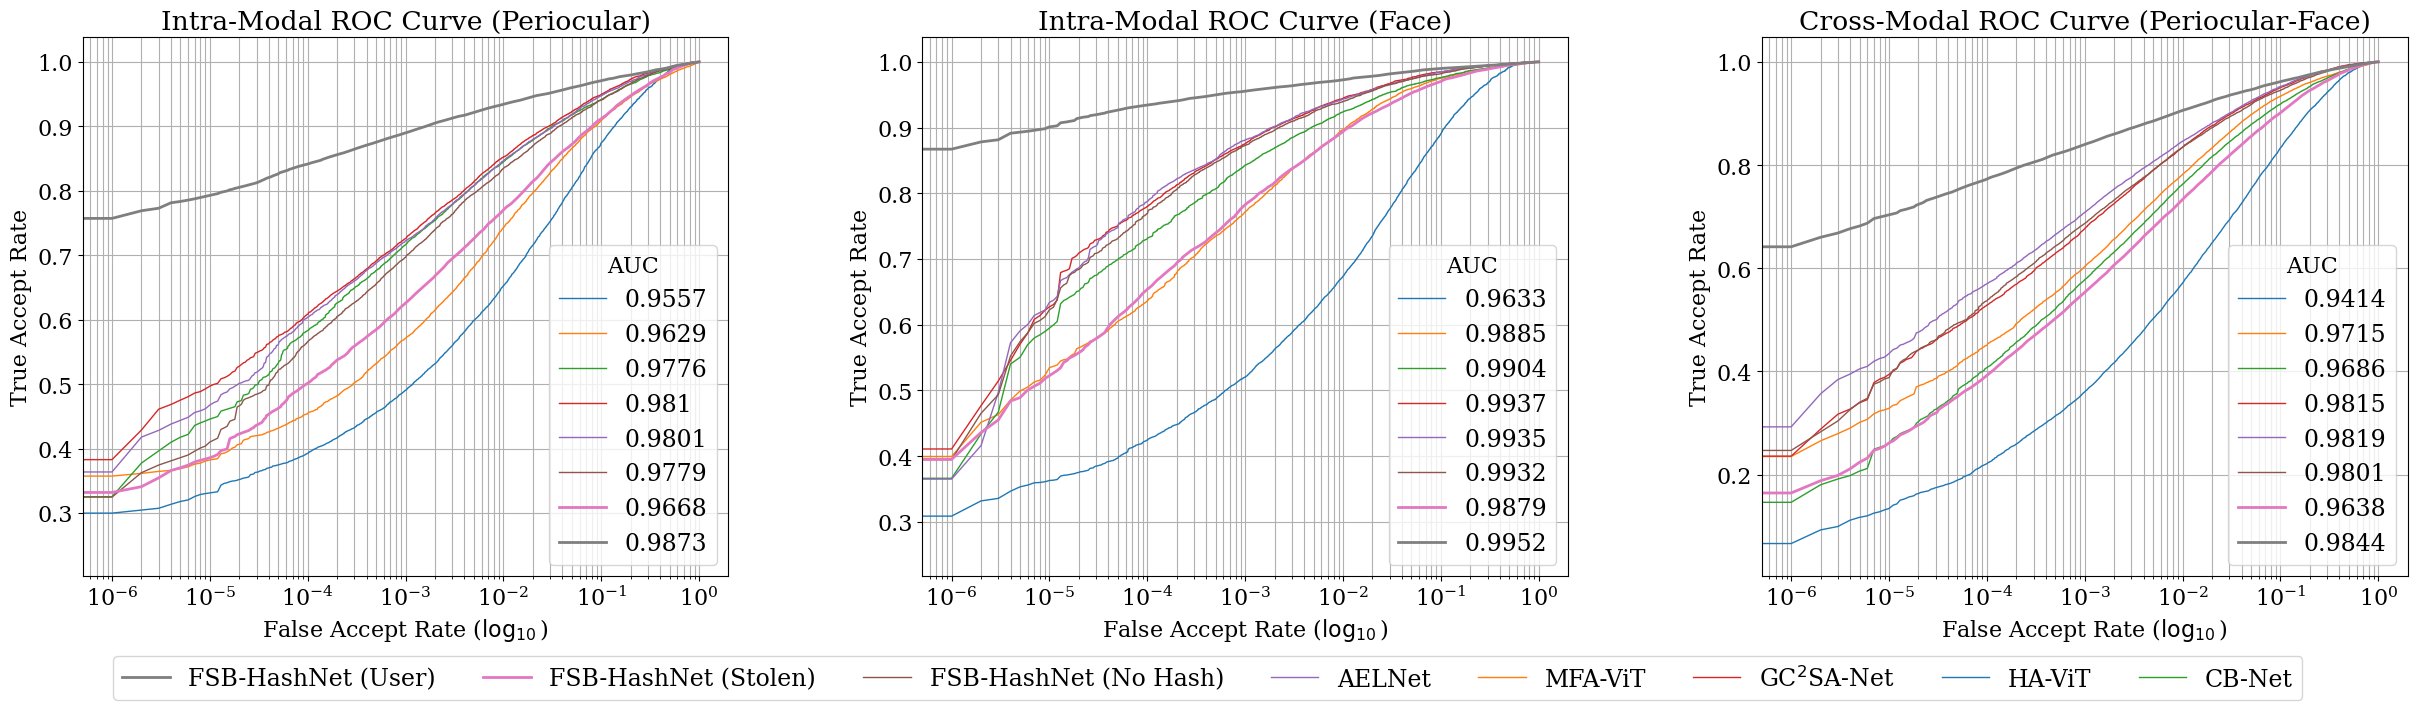

<Figure size 640x480 with 0 Axes>

In [3]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams.update({'font.size': 16, 'legend.fontsize': 17})    

fig, axs = plt.subplots(nrows=1, ncols=3)
fig.set_figheight(7)
fig.set_figwidth(30)
plt.subplots_adjust(wspace=0.3)

# Intra-Modal CMC Curve
axs[0].grid(which='both')
axs[0].set_title('Intra-Modal ROC Curve (Periocular)')
axs[0].set_ylabel('True Accept Rate')
axs[0].set_xlabel('False Accept Rate ($\log_{10}$)')
axs[0].semilogx(base=10)
havit_peri_roc, = axs[0].plot(range_, havit_peri_tpr, label=str(round(havit_peri_avg, 4)), linewidth=1)
mfavit_peri_roc, = axs[0].plot(range_, mfavit_peri_tpr, label=str(round(mfavit_peri_avg, 4)), linewidth=1)
cb_net_peri_roc, = axs[0].plot(range_, cb_net_peri_tpr, label=str(round(cb_net_peri_avg, 4)), linewidth=1)
gc2sa_net_peri_roc, = axs[0].plot(range_, gc2sa_net_peri_tpr, label=str(round(gc2sa_net_peri_avg, 4)), linewidth=1)
ael_net_peri_roc, = axs[0].plot(range_, ael_net_peri_tpr, label=str(round(ael_net_peri_avg, 4)), linewidth=1)
fsb_nohash_peri_roc, = axs[0].plot(range_, fsb_nohash_peri_tpr, label=str(round(fsb_nohash_peri_avg, 4)), linewidth=1)
fsb_hashnet_peri_roc_stolen, = axs[0].plot(range_, fsb_hashnet_peri_tpr_stolen, label=str(round(fsb_hashnet_peri_avg_stolen, 4)), linewidth=2)
fsb_hashnet_peri_roc_user, = axs[0].plot(range_, fsb_hashnet_peri_tpr_user, label=str(round(fsb_hashnet_peri_avg_user, 4)), linewidth=2)
axs[0].legend(bbox_to_anchor=(1, 0), loc="lower right", title="AUC")

# Inter-Modal CMC Curve
axs[1].grid(which='both')
axs[1].set_title('Intra-Modal ROC Curve (Face)')
axs[1].set_ylabel('True Accept Rate')
axs[1].set_xlabel('False Accept Rate ($\log_{10}$)')
axs[1].semilogx(base=10)
havit_face_roc, = axs[1].plot(range_, havit_face_tpr, label=str(round(havit_face_avg, 4)), linewidth=1)
mfavit_face_roc, = axs[1].plot(range_, mfavit_face_tpr, label=str(round(mfavit_face_avg, 4)), linewidth=1)
cb_net_face_roc, = axs[1].plot(range_, cb_net_face_tpr, label=str(round(cb_net_face_avg, 4)), linewidth=1)
gc2sa_net_face_roc, = axs[1].plot(range_, gc2sa_net_face_tpr, label=str(round(gc2sa_net_face_avg, 4)), linewidth=1)
ael_net_face_roc, = axs[1].plot(range_, ael_net_face_tpr, label=str(round(ael_net_face_avg, 4)), linewidth=1)
fsb_nohash_face_roc, = axs[1].plot(range_, fsb_nohash_face_tpr, label=str(round(fsb_nohash_face_avg, 4)), linewidth=1)
fsb_hashnet_face_roc_stolen, = axs[1].plot(range_, fsb_hashnet_face_tpr_stolen, label=str(round(fsb_hashnet_face_avg_stolen, 4)), linewidth=2)
fsb_hashnet_face_roc_user, = axs[1].plot(range_, fsb_hashnet_face_tpr_user, label=str(round(fsb_hashnet_face_avg_user, 4)), linewidth=2)
axs[1].legend(bbox_to_anchor=(1, 0), loc="lower right", title="AUC")

# Intra-Modal ROC Curve
axs[2].grid(which='both')
axs[2].set_title('Cross-Modal ROC Curve (Periocular-Face)')
axs[2].set_ylabel('True Accept Rate')
axs[2].set_xlabel('False Accept Rate ($\log_{10}$)')
axs[2].semilogx(base=10)
havit_cm_roc, = axs[2].plot(range_, havit_cm_tpr, label=str(round(havit_cm_avg, 4)), linewidth=1)
mfavit_cm_roc, = axs[2].plot(range_, mfavit_cm_tpr, label=str(round(mfavit_cm_avg, 4)), linewidth=1)
cb_net_cm_roc, = axs[2].plot(range_, cb_net_cm_tpr, label=str(round(cb_net_cm_avg, 4)), linewidth=1)
gc2sa_net_cm_roc, = axs[2].plot(range_, gc2sa_net_cm_tpr, label=str(round(gc2sa_net_cm_avg, 4)), linewidth=1)
ael_net_cm_roc, = axs[2].plot(range_, ael_net_cm_tpr, label=str(round(ael_net_cm_avg, 4)), linewidth=1)
fsb_nohash_cm_roc, = axs[2].plot(range_, fsb_nohash_cm_tpr, label=str(round(fsb_nohash_cm_avg, 4)), linewidth=1)
fsb_hashnet_cm_roc_stolen, = axs[2].plot(range_, fsb_hashnet_cm_tpr_stolen, label=str(round(fsb_hashnet_cm_avg_stolen, 4)), linewidth=2)
fsb_hashnet_cm_roc_user, = axs[2].plot(range_, fsb_hashnet_cm_tpr_user, label=str(round(fsb_hashnet_cm_avg_user, 4)), linewidth=2)
axs[2].legend(bbox_to_anchor=(1, 0), loc="lower right", title="AUC")

# Legends
line_labels = ["FSB-HashNet (User)", "FSB-HashNet (Stolen)", "FSB-HashNet (No Hash)", "AELNet", "MFA-ViT", "GC$^2$SA-Net", "HA-ViT", "CB-Net"]

fig.legend( handles=[fsb_hashnet_cm_roc_user, fsb_hashnet_cm_roc_stolen, fsb_nohash_cm_roc, ael_net_cm_roc, mfavit_cm_roc, gc2sa_net_cm_roc, havit_cm_roc, cb_net_cm_roc],
            labels=line_labels,   # The labels for each line
            loc="lower center",
            bbox_to_anchor=(0.5, -0.07),
            ncol=8,    # Position of legend
            borderaxespad=0.1)

plt.savefig('../graphs/ROC_sota.pdf', bbox_inches='tight')
plt.show()
plt.clf()